<a href="https://colab.research.google.com/github/feliperost/cineclube/blob/main/Cineclube_teste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cineclube

Análise exploratória de dados com dados de um cineclube realizado entre um grupo de amigos.

# Importando o arquivo

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from google.colab import files

uploaded = files.upload()

Saving cineclube.csv to cineclube.csv


In [2]:
import io

# importando o arquivo e determinando que as vírgulas são decimais, transformando as notas em valores numéricos
df = pd.read_csv(io.BytesIO(uploaded['cineclube.csv']), decimal=',')
# renomeando algumas colunas
df.rename(columns={'Ano FIlme': 'Ano', 'País Filme': 'País'}, inplace=True)

print(df)

                     Filme  tadolfo  rost  mendonsa  xaubiro  cambe  stefano  \
0                 Badlands      7.5   8.0      7.50      2.0    7.5      7.0   
1         Prova_dOrchestra      6.5   7.0      7.25     10.0    4.0      6.0   
2   Brutti_Sporchi_Cattivi      6.5   4.5      7.50      5.0    7.0      7.3   
3                   Trafic      7.5   9.0      7.00      8.0    4.0      5.0   
4               Tilsammans      8.5   7.0      7.00      6.0    8.0      9.0   
..                     ...      ...   ...       ...      ...    ...      ...   
61          AMulherDeTodos      NaN   7.0       NaN      NaN    NaN      NaN   
62       OLoboAtrasDaPorta      NaN   7.0      7.00      NaN    NaN      NaN   
63        MedidaProvisória      6.0   6.0      5.00      NaN    NaN      NaN   
64       TriangleOfSadness      6.5   7.5      7.80      NaN    NaN      6.5   
65                   Hausu      NaN   9.0      8.00      NaN    NaN      8.0   

    tazima  freitas  duba  nota média c

In [3]:
df.head()

,Filme,tadolfo,rost,mendonsa,xaubiro,cambe,stefano,tazima,freitas,duba,nota média cineclube,Nota IMDB,Ano,País
0,Badlands,7.5,8.0,7.50,2.0,7.5,7.0,7.7,NaN,NaN,6.7,7.7,1973,EUA
1,Prova_dOrchestra,6.5,7.0,7.25,10.0,4.0,6.0,5.0,9.0,4.0,6.5,7.1,1978,Itália
2,Brutti_Sporchi_Cattivi,6.5,4.5,7.50,5.0,7.0,7.3,2.0,6.0,4.0,5.5,7.7,1976,Itália
3,Trafic,7.5,9.0,7.00,8.0,4.0,5.0,7.5,NaN,NaN,6.9,7.0,1971,França
4,Tilsammans,8.5,7.0,7.00,6.0,8.0,9.0,8.0,9.0,4.0,7.4,7.4,2000,Suécia


# Explorações iniciais

In [4]:
df.describe()

,tadolfo,rost,mendonsa,xaubiro,cambe,stefano,tazima,freitas,duba,nota média cineclube,Nota IMDB,Ano
count,25.00000,66.000000,62.000000,32.000000,26.000000,45.000000,30.000000,34.000000,26.000000,63.000000,66.000000,66.000000
mean,7.06000,6.652273,6.912097,6.309375,6.250000,7.135556,6.845000,7.073529,4.769231,6.598413,7.384848,1991.696970
std,1.11168,1.944310,1.123325,2.882915,1.919635,1.308044,1.836993,2.335926,2.045633,1.333863,0.600062,22.875563
min,4.00000,2.000000,4.500000,0.000000,3.000000,4.000000,2.000000,1.000000,2.000000,3.100000,4.700000,1926.000000
25%,6.50000,5.500000,6.125000,4.750000,4.625000,6.000000,6.000000,6.000000,4.000000,5.800000,7.100000,1972.250000
50%,7.00000,7.000000,7.000000,7.000000,6.750000,7.300000,7.250000,6.500000,4.000000,6.700000,7.400000,1993.000000
75%,7.50000,8.000000,7.500000,8.250000,7.875000,8.000000,8.000000,9.375000,6.000000,7.600000,7.700000,2013.000000
max,9.00000,10.000000,10.000000,10.000000,10.000000,9.500000,10.000000,10.000000,10.000000,9.600000,8.600000,2022.000000


Observando dados gerais... A nota média dada em nosso cineclube foi 6.59, e a nota média no IMDB para os mesmos filmes foi 7.38.

Tivemos filmes de anos muitos variados (de 1926 a 2022), e o ano médio foi 1991.

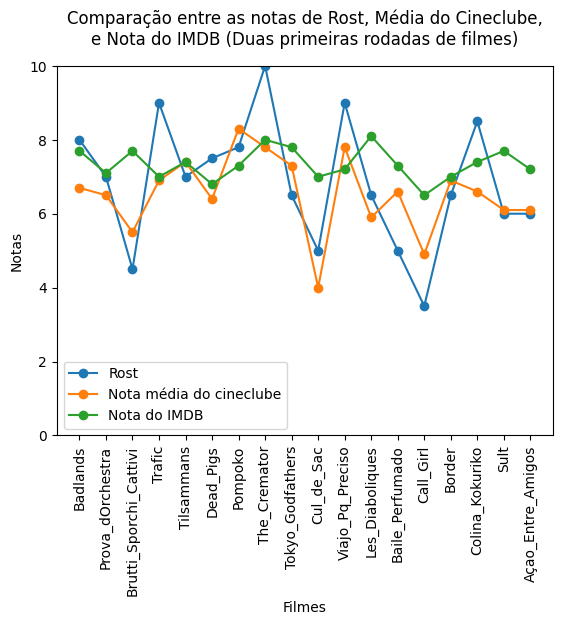

In [5]:
%matplotlib inline

# Comparando as notas dadas por Rost à nota média recebida pelos filmes das duas primeiras rodadas

df_sliced = df[:18] # Limitando o dataframe aos 18 primeiros resultados (2 primeiras rodadas, 9 filmes por rodada)

df_sliced.plot(x="Filme", y=["rost", "nota média cineclube", "Nota IMDB"], marker="o")
plt.title("Comparação entre as notas de Rost, Média do Cineclube,\ne Nota do IMDB (Duas primeiras rodadas de filmes)", pad=15)
plt.xlabel("Filmes")
plt.ylabel("Notas")
plt.xticks(rotation=90) # rotaciona a descrição do eixo x, para melhor visualização
plt.ylim(0, 10) # configura o eixo y para mostrar valores de 0 a 10 (range possível de notas)
plt.xticks(range(len(df_sliced)), df_sliced["Filme"])
plt.legend(labels=['Rost', 'Nota média do cineclube', 'Nota do IMDB'], loc='lower left')

plt.show()

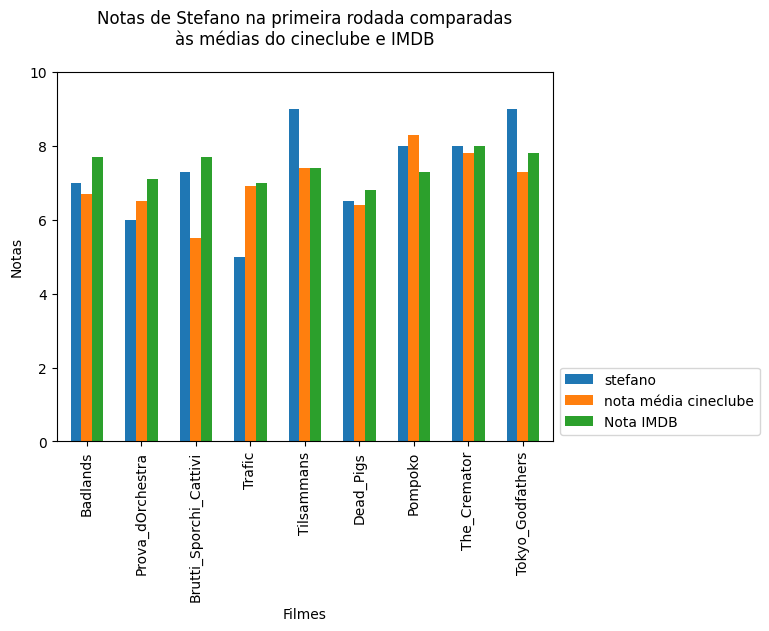

In [6]:
# teste de gráfico de barra

# intervalo da primeira rodada (9 filmes)
df_sliced = df[:9]

bar_width = 0.6
df_sliced.plot.bar(x="Filme", y=["stefano", "nota média cineclube", "Nota IMDB"], width=bar_width)

plt.title("Notas de Stefano na primeira rodada comparadas\nàs médias do cineclube e IMDB", pad=20)
plt.xlabel("Filmes")
plt.ylabel("Notas")
plt.xticks(rotation=90) # rotaciona a descrição do eixo x, para melhor visualização
plt.ylim(0, 10) # configura o eixo y para mostrar valores de 0 a 10 (range possível de notas)
plt.xticks(range(len(df_sliced)), df_sliced["Filme"])
plt.legend(loc='lower left', bbox_to_anchor=(1, 0)) # ajustando a posição da legenda para fora do gráfico

# plt.tight_layout()
plt.show()

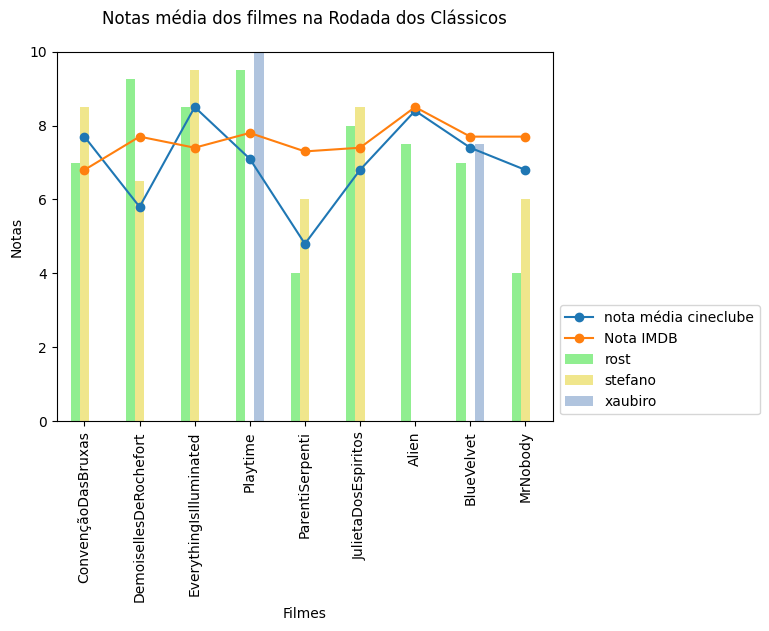

In [7]:
'''
Delimitando o intervalo de filmes que constituiu a Rodada dos Clássicos,
em que cada membro do clube indicou um de seus filmes favoritos.
'''
df_classicos = df[45:54]

# criando um grafico de linha só com a média & nota no IMDB
ax = df_classicos.plot(x="Filme", y=["nota média cineclube", "Nota IMDB"], marker="o")

# aplicando grafico de barra para as notas, e o de linha para a média
df_classicos.plot.bar(x="Filme", y=["rost", "stefano", "xaubiro"], ax=ax, color=['lightgreen', 'khaki', 'lightsteelblue'])

# configurando o gráfico
plt.title("Notas média dos filmes na Rodada dos Clássicos", pad=20)
plt.xlabel("Filmes")
plt.ylabel("Notas")
plt.xticks(rotation=90) # rotaciona a descrição do eixo x
plt.ylim(0, 10) # eixo y com valores de 0 a 10
plt.legend(loc='lower left', bbox_to_anchor=(1, 0)) # posição da legenda

plt.show()

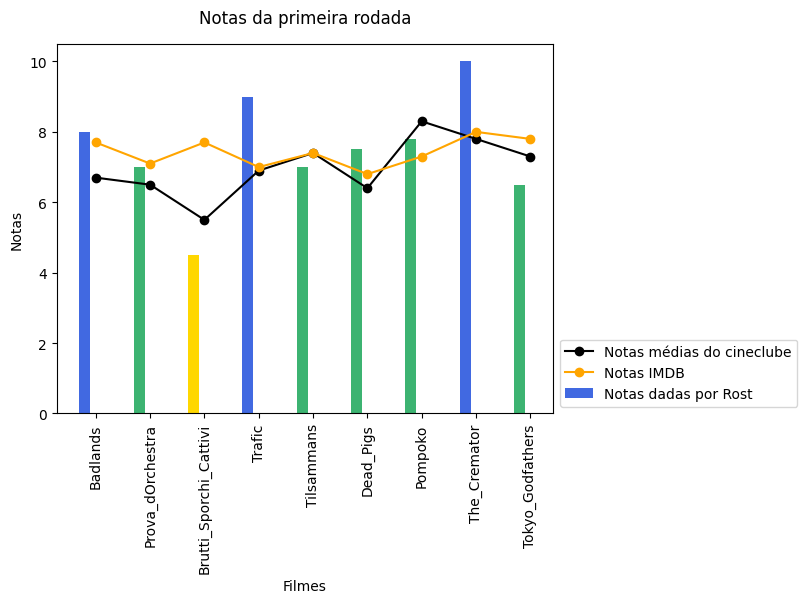

In [8]:
from matplotlib.colors import ListedColormap

# Define as cores para cada intervalo de valores
colors = ["black", "firebrick", "gold", "mediumseagreen", "royalblue"]
# o objeto importado ListedColormap automaticamente divide em 5 partes (por termos definido 5 cores) de 0 a 1.
cmap = ListedColormap(colors)

# Cria o gráfico de barras e define o intervalo da primeira rodada
fig, ax = plt.subplots()
df_sliced = df[:9]

bar_width = 0.2
# na última parte de rost_bars abaixo, color=cmap / 10 é feito para que os valores das notas se enquadrem de 0 a 1,
# podendo assim se encaixar no intervalo de valores do cmap
rost_bars = ax.bar(np.arange(len(df_sliced)), df_sliced["rost"], bar_width, label="Notas dadas por Rost", color=cmap(df_sliced["rost"] / 10))

# adiciona a linha da média com marcadores 'o'
# The original code used a tuple to access two columns, which is incorrect.
# This line has been corrected to plot each column separately.
ax.plot(np.arange(len(df_sliced)) + bar_width, df_sliced["nota média cineclube"], marker='o', linestyle='-', color='black', label="Notas médias do cineclube")
ax.plot(np.arange(len(df_sliced)) + bar_width, df_sliced["Nota IMDB"], marker='o', linestyle='-', color='orange', label="Notas IMDB")


# configurando o gráfico
ax.set_xlabel("Filmes")
ax.set_ylabel("Notas")
ax.set_title("Notas da primeira rodada", pad=15)
ax.set_xticks(np.arange(len(df_sliced)) + bar_width)
ax.set_xticklabels(df_sliced["Filme"], rotation=90)
ax.legend(loc='lower left', bbox_to_anchor=(1, 0))

plt.show()

No gráfico acima, a legenda está confusa... ela sugere que só as notas azuis são de rost, quando na verdade todas do gráfico de barra são.

A fazer: estudar como contornar essa confusão...

In [10]:
df.sort_values(by="rost", ascending=False).head()
# observando as notas mais altas de rost para ver o que os outros membros acharam

,Filme,tadolfo,rost,mendonsa,xaubiro,cambe,stefano,tazima,freitas,duba,nota média cineclube,Nota IMDB,Ano,País
7,The_Cremator,8.5,10.00,8.0,9.9,8.0,8.0,9.0,5.0,4.0,7.8,8.0,1969,Tchéquia
42,SussurrosDoCoração,NaN,10.00,7.0,NaN,7.0,NaN,8.0,10.0,NaN,8.4,7.8,1995,Japão
19,Onde_Fica_a_Casa_Do_Meu_Amigo,NaN,9.50,6.0,9.0,9.0,6.5,NaN,10.0,2.0,7.4,8.1,1987,Irã
48,Playtime,NaN,9.50,7.0,10.0,NaN,NaN,NaN,NaN,2.0,7.1,7.8,1967,França
46,DemoisellesDeRochefort,NaN,9.25,5.5,NaN,NaN,6.5,NaN,NaN,2.0,5.8,7.7,1967,França


Talvez um gráfico de dispersão seja interessante para visualizar a relação entre as notas dos usuários? Vamos tentar:


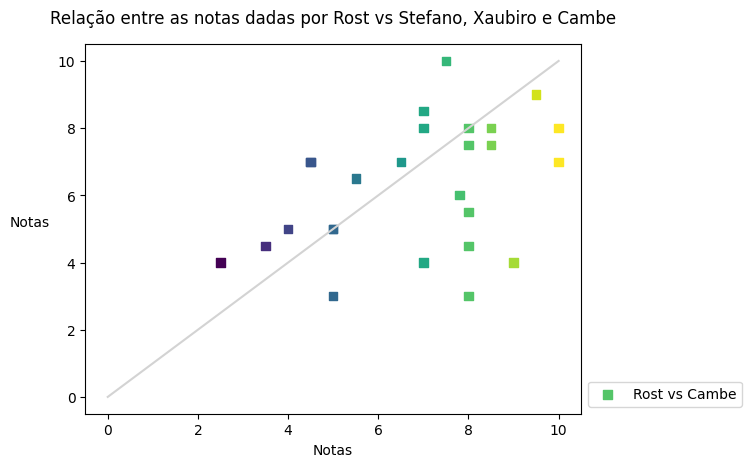

In [46]:
# definindo rost vs stefano, xaubiro e cambe.
# plt.scatter(df['rost'], df['stefano'], label='Rost vs Stefano', marker='o', c=df['rost'], cmap='Blues')
# plt.scatter(df['rost'], df['xaubiro'], label='Rost vs Xaubiro', marker='x', c=df['rost'], cmap='Greens')
plt.scatter(df['rost'], df['cambe'], label='Rost vs Cambe', marker='s', c=df['rost'], cmap='viridis')

plt.title('Relação entre as notas dadas por Rost vs Stefano, Xaubiro e Cambe', pad=15)
plt.xlabel('Notas')
plt.ylabel('Notas', rotation=0, labelpad=20)
plt.xlim(-0.5, 10.5)
plt.ylim(-0.5, 10.5)

# linha diagonal que representa a concordancia:
# símbolos estarem mais próximos da linha significam que os usuários concordavam mais em suas notas
plt.plot([0, 10], [0, 10], color='lightgray', linestyle='-')

plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

plt.show()

Talvez um heatmap seja mais interessante para visualizarmos as notas de todos os membros nas duas primeiras rodadas:

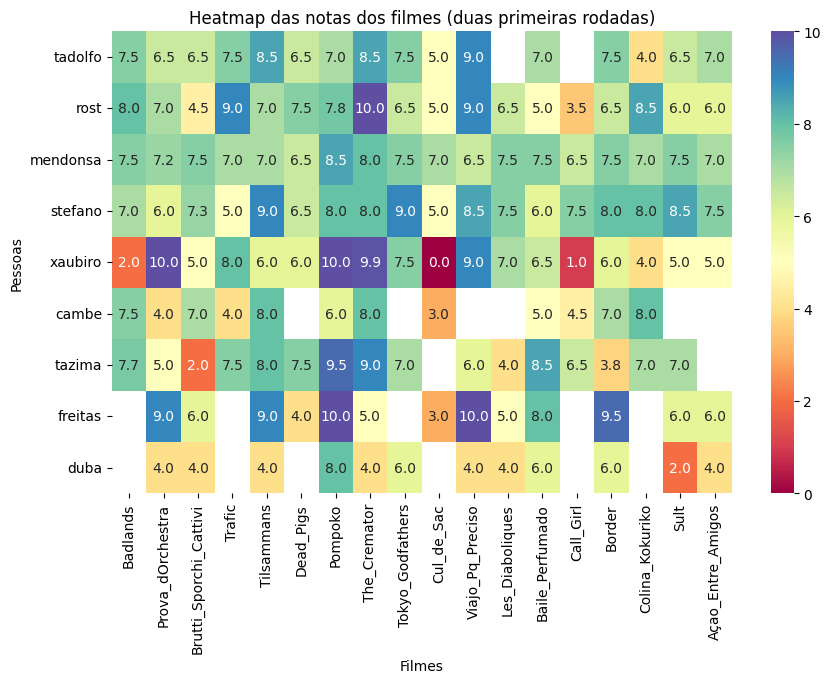

In [14]:
# Seleciona as duas primeiras rodadas e as colunas desejadas
df_heatmap = df[:18][['Filme', 'tadolfo', 'rost', 'mendonsa', 'stefano', 'xaubiro', 'cambe', 'tazima', 'freitas', 'duba']].set_index('Filme').T

plt.figure(figsize=(10, 6))
sns.heatmap(df_heatmap, annot=True, cmap='Spectral', fmt=".1f")
plt.title('Heatmap das notas dos filmes (duas primeiras rodadas)')
plt.xlabel('Filmes')
plt.ylabel('Pessoas')
plt.yticks(rotation=0)
plt.show()

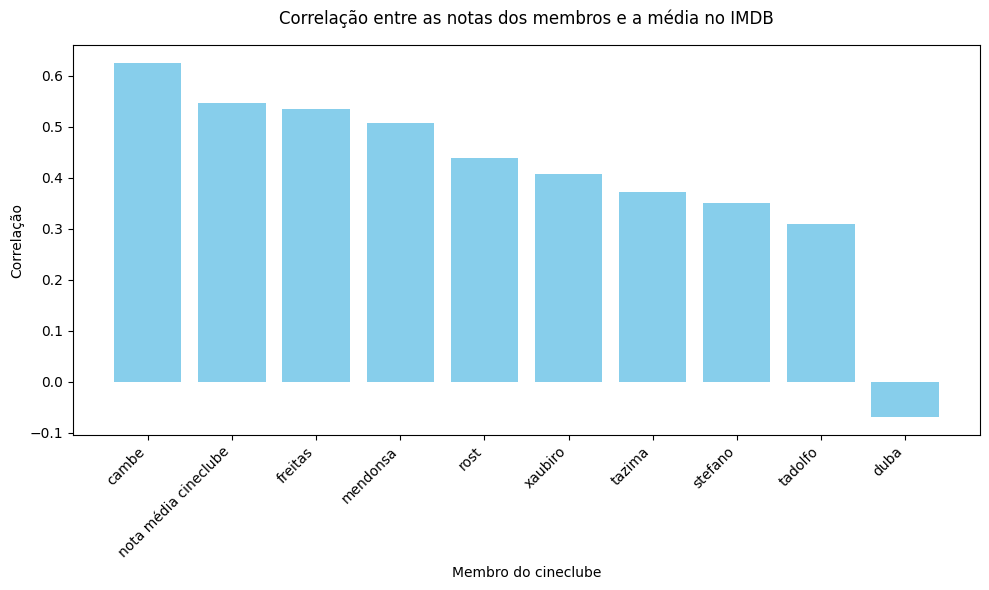

In [55]:
# qual membro teve notas mais semelhantes à média do IMDB?

# calcula a correlação entre cada usuário e o IMDB, excluindo a coluna 'Filme', 'País', e 'Ano'
correlacoes = df.drop(['Filme', 'País', 'Ano'], axis=1).corr()['Nota IMDB'].drop('Nota IMDB')

# ordena as correlações em ordem decrescente
correlacoes_ordenadas = correlacoes.sort_values(ascending=False)

# criando um gráfico de barras com o resultado
plt.figure(figsize=(10, 6))
plt.bar(correlacoes_ordenadas.index, correlacoes_ordenadas.values, color='skyblue')
plt.title('Correlação entre as notas dos membros e a média no IMDB', pad=15)
plt.xlabel('Membro do cineclube')
plt.ylabel('Correlação')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Em resumo, o gráfico acima permite visualizar quais usuários têm gostos mais alinhados com a média de notas do IMDB (mais à esquerda, próximos de 1), e quais usuários têm preferências mais divergentes (mais à direita, próximos de 0 ou negativos). Correlação negativa demonstra uma tendência a discordar da nota média no IMDB.

# Exploração de piadas recorrentes

## Mendonça abusou do 7?

Uma das piadas recorrentes no cineclube era a impressão de que o membro Mendonça dava notas na faixa de 7 para todos os filmes.

Vamos explorar os dados e ver se isso se comprova.

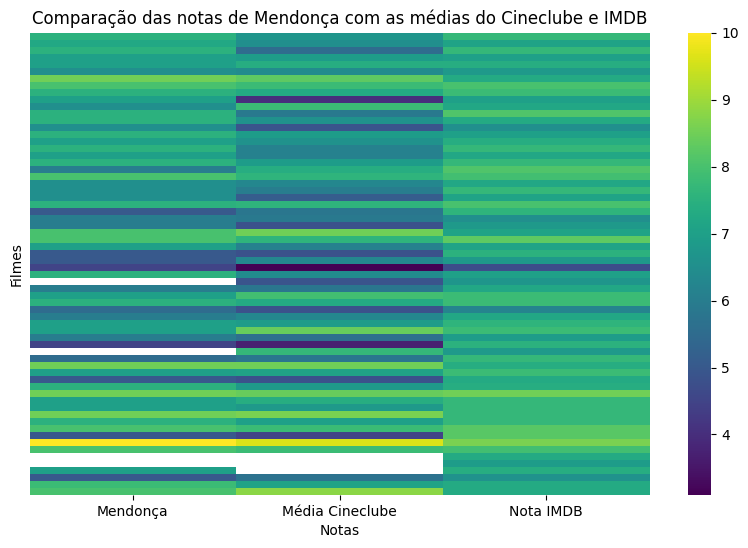

In [16]:
# vamos ver se isso se comprova criando um heatmap comparado às médias do cineclube e à nota no imdb.
df_mendonsa = df[['Filme', 'mendonsa', 'nota média cineclube', 'Nota IMDB']].rename(columns={'mendonsa': 'Mendonça', 'nota média cineclube': 'Média Cineclube'}).set_index('Filme')

plt.figure(figsize=(10, 6))
# annot e ytciklabels foram removidos para focar a visualização das cores
sns.heatmap(df_mendonsa, annot=False, yticklabels=False, cmap='viridis')
plt.title('Comparação das notas de Mendonça com as médias do Cineclube e IMDB')
plt.xlabel('Notas')
plt.ylabel('Filmes')
plt.show()

O heatmap acima mostra que no início do cineclube Mendonça utilizou muitas notas entre 7 e 8.

estudar: https://psychology.stackexchange.com/questions/25611/explaining-mathematically-why-most-people-chose-7-when-asked-to-chose-a-number-b

O gráfico também mostra que, por mais que os filmes selecionados sejam de países e anos variados, em geral as notas do IMDB também são homogêneas (com exceção de um ou outro registro).

## Duba abusou do 2/5?

A escala definida por Duba era de 0 a 5 estrelas. Ou seja, convertidas para uma escala de 0 a 10, as notas dele só poderiam ser 0, 2, 4, 6, 8 ou 10.

Tínhamos a impressão de que Duba dava a nota 2/5 muitas vezes (e essa nota, na opinião dele, não é a mesma coisa que 4 de 10...).
Vamos ver se isso se comprova com alguns gráficos.


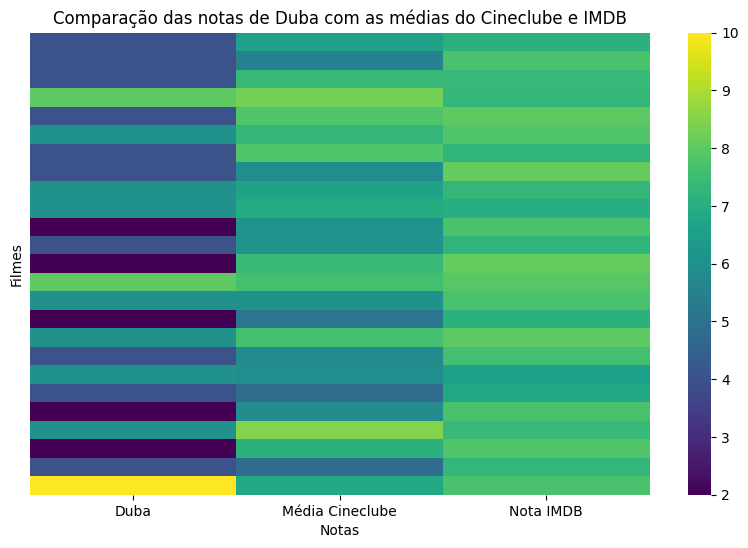

In [66]:
# criando o dataframe de duba + médias, e removendo os registros incompletos dele
df_duba = df[['Filme', 'duba', 'nota média cineclube', 'Nota IMDB']].rename(columns={'duba': 'Duba', 'nota média cineclube': 'Média Cineclube'}).set_index('Filme')

# para remover os registros incompletos
df_duba = df_duba.dropna()

# criando o gráfico
plt.figure(figsize=(10, 6))
# annot e ytciklabels foram removidos para focar a visualização das cores
sns.heatmap(df_duba, annot=False, yticklabels=False, cmap='viridis')
plt.title('Comparação das notas de Duba com as médias do Cineclube e IMDB')
plt.xlabel('Notas')
plt.ylabel('Filmes')
plt.show()

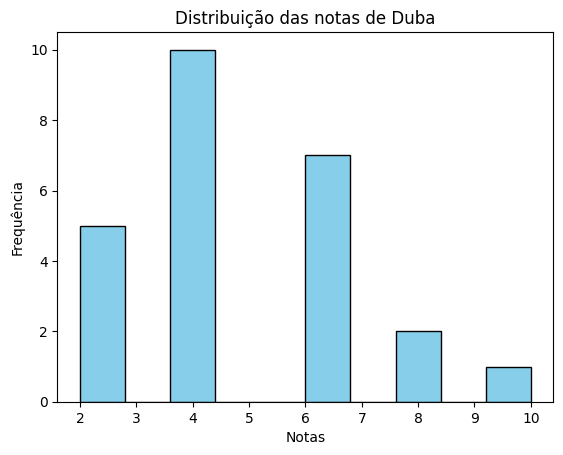

In [68]:
# criando um histograma para ver a tendência em Duba dar nota 4
df_duba = df[['Filme', 'duba', 'nota média cineclube', 'Nota IMDB']].rename(columns={'duba': 'Duba', 'nota média cineclube': 'Média Cineclube'}).set_index('Filme')
df_duba = df_duba.dropna()

# criando o gráfico
plt.hist(df_duba['Duba'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribuição das notas de Duba')
plt.xlabel('Notas')
plt.ylabel('Frequência')
plt.show()

Com isso, podemos ver que além da tendência em notas 4 existir, o gosto de Duba era difícil de agradar!


# Estudos com Ano e País dos filmes do cineclube


## Explorações com o ano de lançamento dos filmes

Inicialmente, vamos criar um gráfico de dispersão com a nota média do cineclube e o ano dos filmes, para verificar se há alguma relação entre o ano do filme e a sua nota

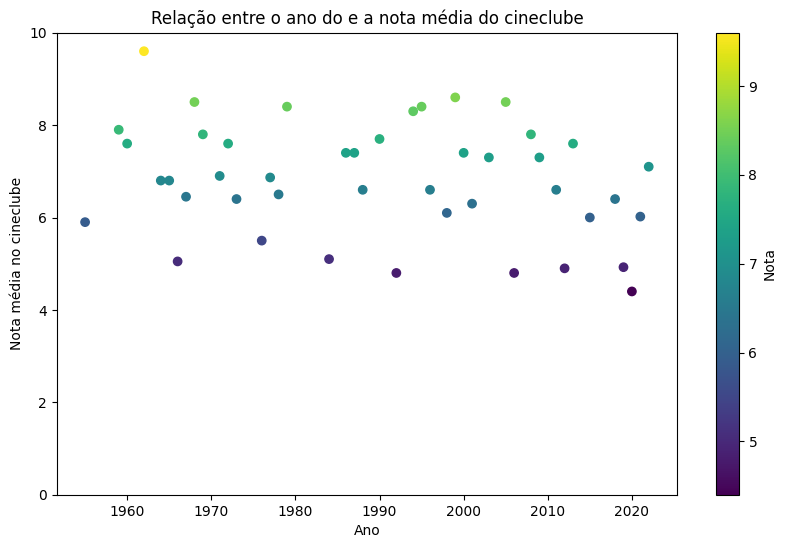

In [19]:
# delimitando o dataframe com o ano e a nossa nota média
df_ano_nota = df.groupby('Ano')['nota média cineclube'].mean().reset_index()
# o .reset_index() transforma o ano de volta em uma coluna normal do df, e cria um novo índice numérico sequencial (0, 1, 2, ...)
# é preciso fazer isso para usar as colunas 'Ano' e 'nota média cineclube' como eixos x e y no gráfico de dispersão

plt.figure(figsize=(10, 6))
# c= define que a cor de cada ponto será baseada pelo seu valor na coluna "nota média cineclube".
plt.scatter(df_ano_nota['Ano'], df_ano_nota['nota média cineclube'], c=df_ano_nota['nota média cineclube'], cmap='viridis')
plt.title('Relação entre o ano do e a nota média do cineclube')
plt.ylim(0, 10)
plt.xlabel('Ano')
plt.ylabel('Nota média no cineclube')
plt.colorbar(label='Nota')
plt.show()

Com isso, podemos ver que não há muita correlação entre o ano do lançamento do filme e sua nota média em nosso cineclube, já que filmes de todas as décadas tiveram notas altas e baixas.

Entretanto, podemos notar que a nota média mais alta foi um filme antigo (da década de 60), e a nota média mais baixa foi um filme recente (de 2020).

Vamos ver um gráfico dos 10 filmes com a melhor nota média no Cineclube, e o ano de seu lançamento:

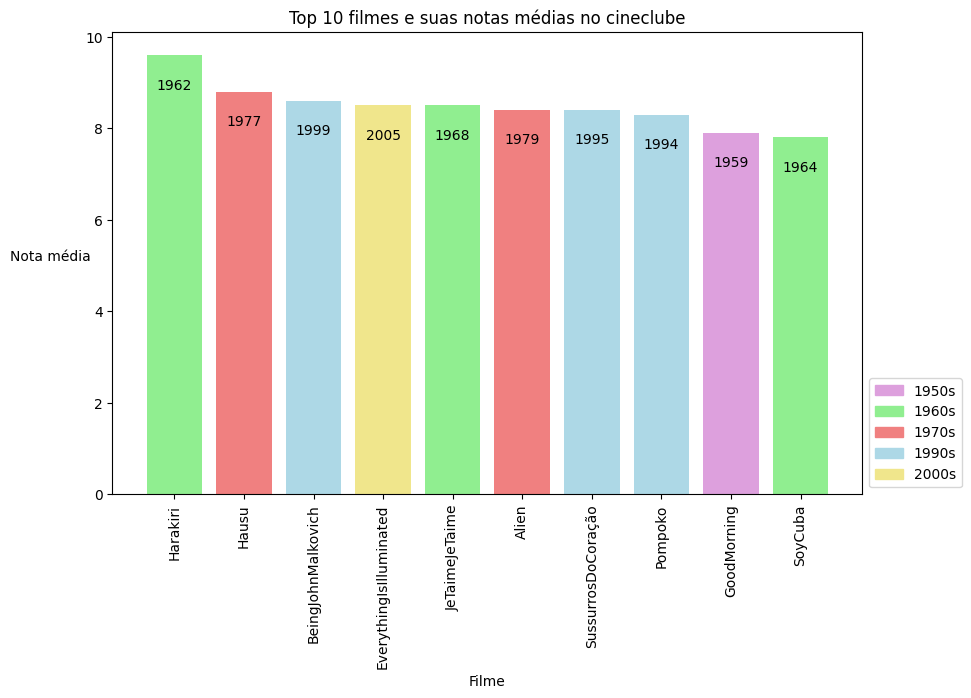

In [24]:
# definindo o top 10 de filmes pela média no cineclube
df_top10 = df.sort_values(by='nota média cineclube', ascending=False).head(10)

# definindo cores para cada década
mapa_cores = {
    1950: 'plum',
    1960: 'lightgreen',
    1970: 'lightcoral',
    1980: 'lightpink',
    1990: 'lightblue',
    2000: 'khaki',
    2010: 'mediumpurple',
    2020: 'lightgray'
}

# mapeando cada ano para uma cor (o valor é arredondado e se encaixa em uma década)
cores_barras = [mapa_cores[ano // 10 * 10] for ano in df_top10['Ano']]

# criando o gráfico
plt.figure(figsize=(10, 6))
plt.bar(df_top10['Filme'], df_top10['nota média cineclube'], color=cores_barras)
plt.title('Top 10 filmes e suas notas médias no cineclube')
plt.xlabel('Filme')
plt.ylabel('Nota média', rotation=0, labelpad=25)
plt.xticks(rotation=90)
plt.yticks(rotation=0)

for i, v in enumerate(df_top10['nota média cineclube']):
  ano = df_top10['Ano'].iloc[i]
  plt.text(i, v - 0.5, str(ano), color='black', ha='center', va='top')

plt.ylim(0, df['nota média cineclube'].max() + 0.5)
plt.subplots_adjust(left=0.15)
plt.margins(x=0.05)

# criando a legenda, associando ela ao nosso dicionario de cores
handles = [plt.Rectangle((0,0),1,1,color=mapa_cores[decada]) for decada in [1950, 1960, 1970, 1990, 2000]]
labels = ['1950s', '1960s', '1970s', '1990s', '2000s']
plt.legend(handles, labels, loc='lower left', bbox_to_anchor=(1, 0))

plt.show()

Temos um top 10 bem variado:

* 3 filmes dos anos 60
* 3 filmes dos anos 90
* 2 filmes dos anos 70
* 1 filme dos anos 2000
* 1 filme dos anos 50


## Explorações com o País de origem do filme

Primeiramente, dos países que tiveram ao menos 3 filmes no cineclube, quais sãos suas notas médias no cineclube e no IMDB?

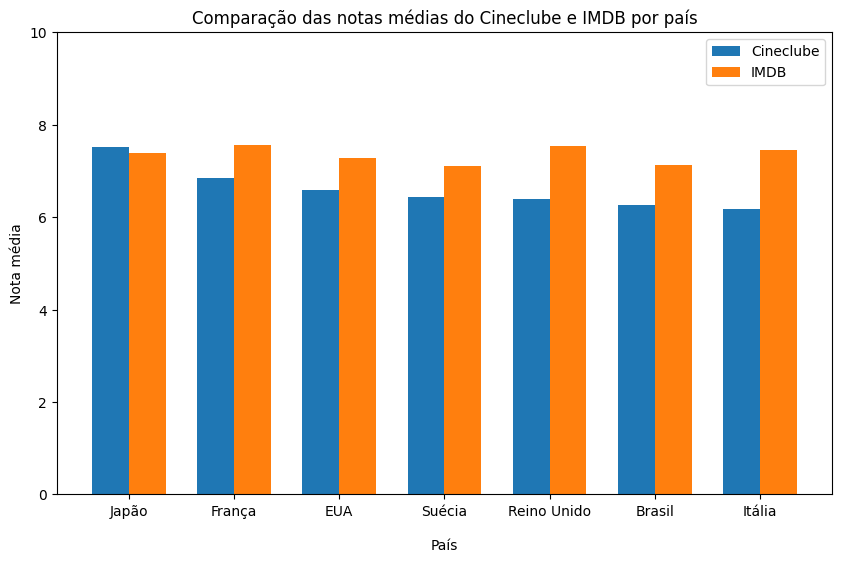

In [25]:
# filtrando e selecionando os países com pelo menos 3 filmes, e ordenando-os de acordo com a média no cineclube
df_filtrado = df.groupby('País').filter(lambda x: len(x) >= 3)
df_pais = df_filtrado.groupby('País')[['nota média cineclube', 'Nota IMDB']].mean().sort_values(by='nota média cineclube', ascending=False)

largura_barra = 0.35
posicoes = np.arange(len(df_pais.index))

plt.figure(figsize=(10, 6))
plt.bar(posicoes - largura_barra / 2, df_pais['nota média cineclube'], largura_barra, label='Cineclube')
plt.bar(posicoes + largura_barra / 2, df_pais['Nota IMDB'], largura_barra, label='IMDB')

plt.title('Comparação das notas médias do Cineclube e IMDB por país')
plt.ylim(0, 10)
plt.xlabel('País', labelpad=15)
plt.ylabel('Nota média')
plt.xticks(posicoes, df_pais.index, rotation=0)
plt.legend()
plt.show()

Com esse gráfico, podemos ver que o país em que a média de notas de nosso cineclube mais se assemelhou à média do IMDB foi o Japão, e o que menos se assemelhou foi a Itália.

Agora, considerando registros únicos (alguns países apareceram apenas uma vez), qual o top 10 de filmes e seus países de origem?

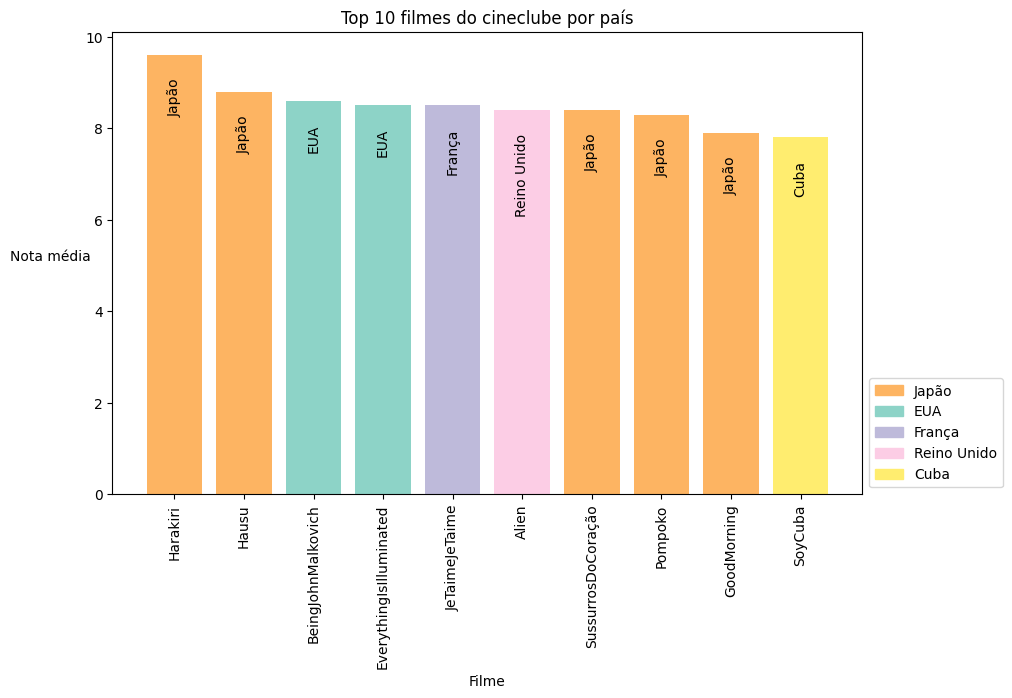

In [43]:
# definindo o top 10 de filmes pela média no cineclube
df_top10 = df.sort_values(by='nota média cineclube', ascending=False).head(10)

# definindo cores para cada país presente no dataframe (para cada registro único de país)
# para mudar o esquema de cores, trocar o "Set3" - usar a referencia de cores da documentaçao do matplotlib
paises_unicos = df['País'].unique()
mapa_cores = {pais: plt.cm.Set3(i) for i, pais in enumerate(paises_unicos)}

# mapeando cada país para uma cor
cores_barras = [mapa_cores[pais] for pais in df_top10['País']]

# criando o gráfico
plt.figure(figsize=(10, 6))
plt.bar(df_top10['Filme'], df_top10['nota média cineclube'], color=cores_barras)
plt.title('Top 10 filmes do cineclube por país')
plt.xlabel('Filme')
plt.ylabel('Nota média', rotation=0, labelpad=25)
plt.xticks(rotation=90)
plt.yticks(rotation=0)

for i, v in enumerate(df_top10['nota média cineclube']):
  pais = df_top10['País'].iloc[i]
  plt.text(i, v - 0.5, pais, color='black', ha='center', va='top', rotation=90)

plt.ylim(0, df['nota média cineclube'].max() + 0.5)
plt.subplots_adjust(left=0.15)
plt.margins(x=0.05)

# criando a legenda
handles = [plt.Rectangle((0,0),1,1,color=mapa_cores[pais]) for pais in df_top10['País'].unique()]
labels = df_top10['País'].unique()
plt.legend(handles, labels, loc='lower left', bbox_to_anchor=(1, 0))

plt.show()

Dos 10 filmes, 5 são do Japão!